# Tareas

In [2]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from __future__ import division

## Problema 1

**(a)** Usando **SimPy** demostrar que 

$$
\frac{\partial}{\partial \beta_j} \textbf{J}(\beta) = \frac{1}{m}\sum_{i=1}^{m}\left(\hat{y}(x^{(i)}) - y(x^{(i)})\right) \cdot x^{(i)}_j
$$

wait what why would you even do this http://en.wikipedia.org/wiki/Linear_least_squares_%28mathematics%29#Derivation_of_the_normal_equations

## Problema 2

In [94]:
class RegresionLineal:
    def __init__(self, alpha=0.3, max_iters=100, tols=0.001):
        """
        Parámetros.
        ---------------
        alpha = Learning rate
        max_iters = Número máximo de iteraciones
        tols = definición de convergencia
        """
        self.alpha = alpha
        self.max_iters = max_iters
        self.tols = tols
        self.breaking_iteration = None
        self.historia = {'costo':[], 'beta':[]}  # Con fines de graficación
        
    def gradientDescent(self, x, y):
        """
        Parámetros:
        ---------------
        x = vector de entrenamiento de features
        y = vector de entrenamiento de variable a predecir (target)
        """    
        
        # ajustamos el vector de features
        unos = np.ones((x.shape[0], 1))
        Xt = x.reshape(x.shape[0], 1)
        Xt = np.concatenate((unos, Xt), axis=1)
        
        i = 0
        prep_J = 0
        m, n = Xt.shape
        self.beta = np.zeros(n) 
        
        while i < self.max_iters:     
            # Actualizamos beta
            self.beta = self.beta - self.alpha * self.gradiente(Xt, y)
            
            J = self.costo(Xt, y)
            
            if abs(J - prep_J) <= self.tols:
                print 'La función convergió con beta: %s en la iteración %i' % ( str(self.beta), i )
                self.breaking_iteration = i
                break
            else:
                prep_J = J
            
            self.historia['costo'].append(J)
            self.historia['beta'].append(self.beta)                
            i += 1
    
    def hipotesis(self, x):
        return np.dot(x, self.beta)
    
    def costo(self, x, y):
        m = x.shape[0]
        error = self.hipotesis(x) - y
        return np.dot(error.T, error) / (2 * m) 
    
    def gradiente(self, x, y):
        m = x.shape[0]
        error = self.hipotesis(x) - y        
        return np.dot(x.T, error) / m

In [176]:
def plotBeta(X, Y, beta):
    plt.figure(figsize = (6,6))
    f = lambda x: beta[0] + beta[1]*x
    plt.scatter(X, Y, label="Data")
    plt.plot(X, f(X), label='Guess')
    plt.grid()
    plt.show()

**(a)**  Usando los datos de `chirps.txt`

Entrenar una regresión lineal. Grafique los datos y el mejor modelo. Explique como llegó a los valores de $\alpha$. ¿Coinciden con los mostrados en la página web?

<div class="alert alert-warning">
**NOTA**: Datos obtenidos de [aquí](http://mathbits.com/MathBits/TISection/Statistics2/linearREAL.htm)
</div>

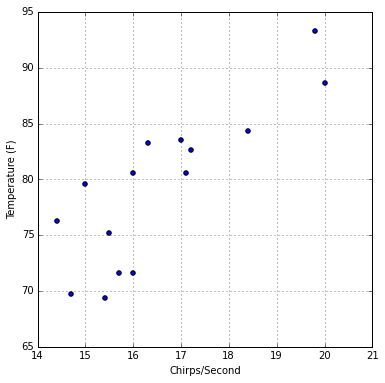

In [177]:
x, y = np.loadtxt('data/chirps.txt', unpack = True)
plt.figure(figsize = (6,6))
plt.scatter(x, y)
plt.grid()
plt.xlabel('Chirps/Second')
plt.ylabel('Temperature (F)')
plt.show();

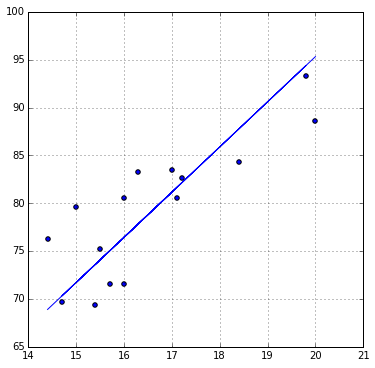

In [190]:
r = RegresionLineal(alpha=0.0003, max_iters=10000, tols=0.0000001)
np.seterr(all = 'raise')
r.gradientDescent(x, y)
plotBeta(x, y, r.beta)

Sí, sí coinciden los datos contra los de la página original. (Y se ven más bonitos :P)

## Problema 3

**(a)** Usando los datos del [cuarteto de Anscombe](http://en.wikipedia.org/wiki/Anscombe%27s_quartet) Calcule la regresión lineal ¿Qué sucede?

In [179]:
AX = np.array([
        [10., 8., 13., 9., 11., 14., 6., 4., 12., 7., 5.],
        [10., 8., 13., 9., 11., 14., 6., 4., 12., 7., 5.],
        [10., 8., 13., 9., 11., 14., 6., 4., 12., 7., 5.],
        [8., 8., 8., 8., 8., 8., 8., 19., 8., 8., 8.]
        ])

AY = np.array([
        [8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68],
        [9.14, 8.14, 8.74, 8.77, 9.26, 8.10, 6.13, 3.10, 9.13, 7.26, 4.74],
        [7.46, 6.77, 12.74, 7.11, 7.81, 8.84, 6.08, 5.39, 8.15, 6.42, 5.73],
        [6.58, 5.76, 7.71, 8.84, 8.47, 7.04, 5.25, 12.50, 5.56, 7.91, 6.89]
      ])

[ 2.8885119   0.51113941]


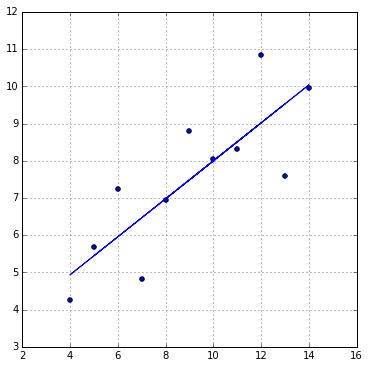

[ 2.88929881  0.5110516 ]


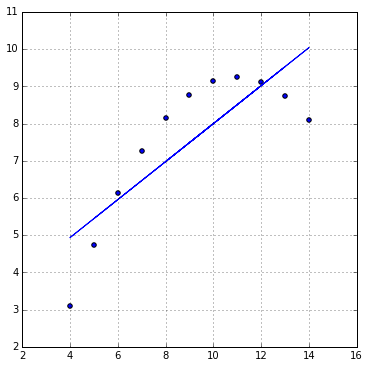

[ 2.8907848   0.51078476]


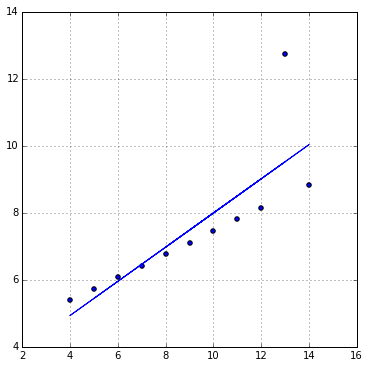

[ 2.89008571  0.51096378]


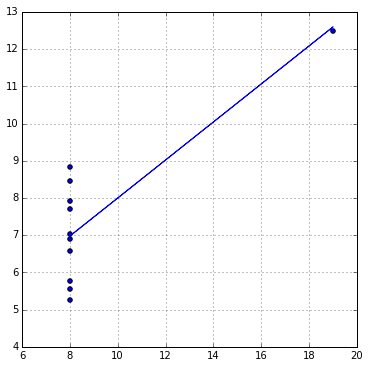

In [191]:
for i in range(4):
    r = RegresionLineal(alpha=0.003, max_iters=10000, tols=0.0000001)
    r.gradientDescent(AX[i,:], AY[i,:])
    print r.beta
    plotBeta(AX[i,:], AY[i,:], r.beta)

Las regresiones son las mismas! No sólo eso: La media y varianza de x son iguales en los 4 conjuntos de datos.

## Problema 4

Use el archivo `radioactive_decay.dat`

In [181]:
x4, y4 = np.loadtxt('data/radioactive_decay.txt', unpack = True)

**(a)** Grafique los datos ¿Qué forma tienen?

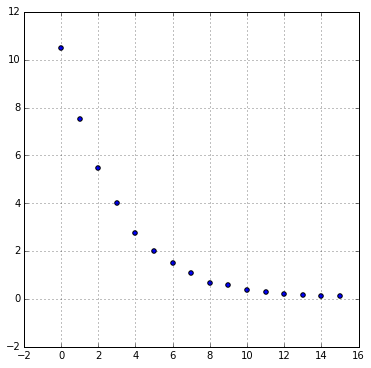

In [195]:
plt.figure(figsize=(6,6))
plt.scatter(x4, y4)
plt.grid()
plt.show()

Un decaimiento exponencial (oh, sorpresa).

**(b)** ¿Qué transformación se le ocurre para linearizarlos? Explique y grafique de nuevo.

Tomar un logaritmo.

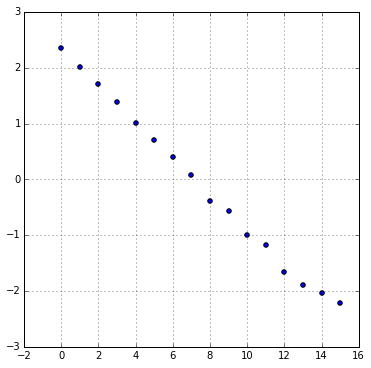

In [196]:
y4l = np.log(y4)
plt.figure(figsize=(6,6))
plt.scatter(x4, y4l)
plt.grid()
plt.show()

**(c)** Aplique la regresión lineal a este conjunto de datos transformado.

La función convergió con beta: [ 2.28993333 -0.31599948] en la iteración 7167


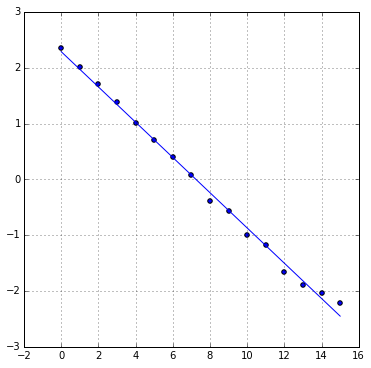

In [197]:
r = RegresionLineal(alpha=0.003, max_iters=100000, tols=0.00000001)
np.seterr(all = 'raise')
r.gradientDescent(x4, y4l)
plotBeta(x4, y4l, r.beta)

**(d)** ¿Cuáles son los valores de $\beta$ que mejor ajustan? ¿Cuáles son el espacio sin transformar? Explique.

In [198]:
print r.beta

[ 2.28993333 -0.31599948]


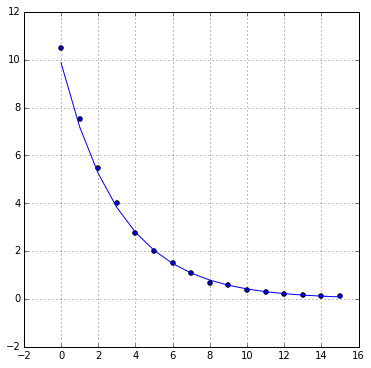

In [199]:
plt.figure(figsize = (6,6))
f = lambda x: np.exp(r.beta[0] + r.beta[1]*x)
plt.scatter(x4, y4, label="Data")
plt.plot(x4, f(x4), label='Guess')
plt.grid()
plt.show()

Si para linearizar tomamos un logaritmo,
de regreso simplemente basta tomar la exponencial de la función lineal de la regresión.